<a href="https://colab.research.google.com/github/TruptiGujarathi87/MachineLearning/blob/main/LinearRegression/LinearRegressionTypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Supervised Learning:

-Regression
  -Labelled(Input + Output(Target Attribute))
  -task: To predict the continuous value

-Classification
  -Labelled (Target attribute)
  -Task: To identify two particular class label

# Simple Linear Regression

- Step1: Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Step2: Import dataset



In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/SalExp.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0




*   Step3: Indentify Dependent and independent variable



In [4]:
#Independent variable
X = dataset.iloc[:,:-1].values

In [5]:
#dependent variable
y = dataset.iloc[:,-1].values

In [6]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

Step4: Split the dataset into Training and Testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0 )

Step5: Build the Simple LR Model

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = reg.predict(X_test)

In [11]:
#Predicted value by model
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

# Step 6: Visualisation the training set

Text(0, 0.5, 'Experience')

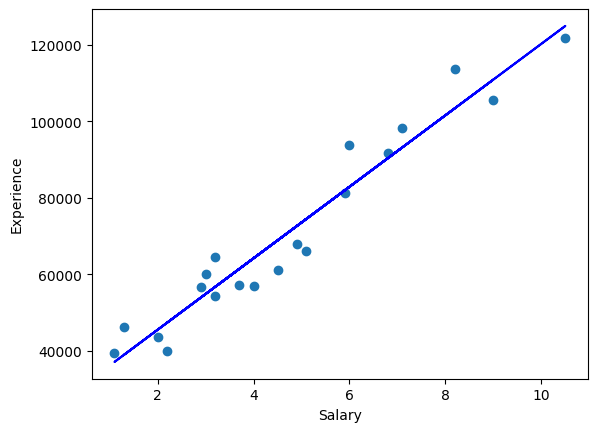

In [12]:
#Training dataset
plt.scatter(X_train, y_train)
plt.plot(X_train,reg.predict(X_train), color = 'blue')
plt.xlabel('Salary')
plt.ylabel('Experience')

Text(0, 0.5, 'Experience')

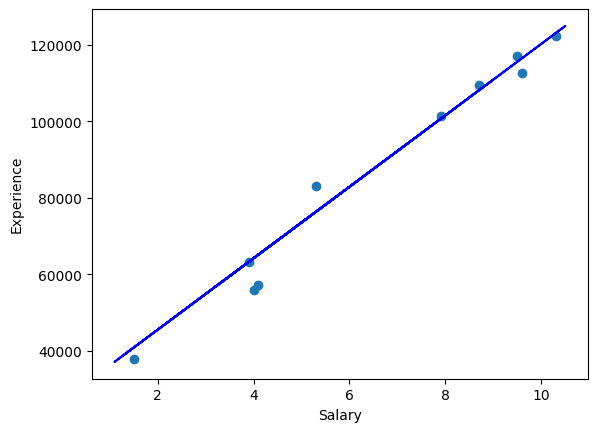

In [13]:
#Testing dataset
plt.scatter(X_test, y_test)
plt.plot(X_train,reg.predict(X_train), color = 'blue')
plt.xlabel('Salary')
plt.ylabel('Experience')

In [14]:
b = reg.coef_
b

array([9345.94244312])

In [15]:
a = reg.intercept_
a

26816.192244031183

In [16]:
#y = mx + c
#y = 9345.94244312

In [17]:
from sklearn import metrics

In [18]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse

21026037.329511296

In [19]:
import statsmodels.api as sm

In [20]:
X_stats = sm.add_constant(X_train)

In [21]:
summ = sm.OLS(y_train, X_stats).fit()

In [22]:
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     273.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           2.51e-12
Time:                        16:45:54   Log-Likelihood:                -202.60
No. Observations:                  20   AIC:                             409.2
Df Residuals:                      18   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.682e+04   3033.148      8.841      0.000    2.04e+04    3.32e+04
x1          9345.9424    565.420     16.529      0.000    8158.040    1.05e+04
==============================================================================
Omnibus:                        2.688   Durbin-Watson:                   2.684
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.386
Skew:                           0.305   Prob(JB):                        0.500
Kurtosis:                       1.864   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Multi-linear Regression

In [23]:
#Regression
# -Linear Regression:
# -Lr is a type of supervised learning

In [24]:
#Import dataset
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/Profit.csv")

In [25]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
dataset.shape

(50, 5)

In [27]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [28]:
#dependent and independent variable
X = dataset.iloc[:,:-1].values

In [29]:
y = dataset.iloc[:,-1].values

In [30]:
#Apply encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [31]:
ct = ColumnTransformer(transformers=[('encodeer', OneHotEncoder(),[3])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [32]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [34]:
#Build Linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159795, 132582.27760816, 132447.73845175,  71976.09851258,
       178537.48221057, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569552])

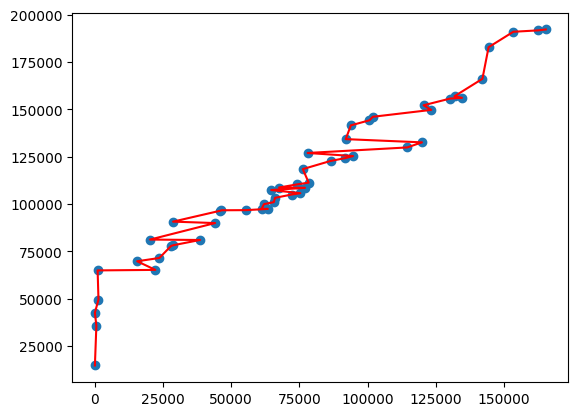

In [36]:
plt.scatter(dataset['R&D Spend'],dataset['Profit'])
plt.plot(dataset['R&D Spend'], dataset['Profit'], color = 'r')

# Plynomial Regression

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/WeightHeight.csv")
dataset

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [39]:
x = dataset.iloc[:,0:1].values
y = dataset.iloc[:,1].values

In [40]:
#Split the datastation
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state = 0)

In [42]:
#Build Linear Model
from sklearn.linear_model import LinearRegression
LinModel = LinearRegression()
LinModel.fit(X_train,y_train)

LinearRegression()

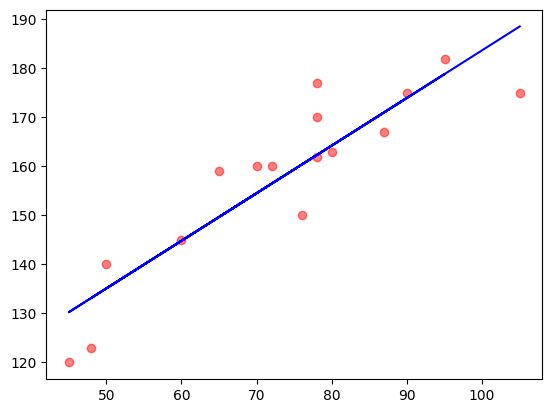

In [43]:
plt.scatter(X_train,y_train, c='red',cmap=None, alpha=0.5)
plt.plot(X_train,LinModel.predict(X_train),color='blue')

Build Polynomial Model

In [44]:
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(X_train)

In [45]:
#Fitting the model
Polymodel = LinearRegression()
Polymodel.fit(X_polynom,y_train)

LinearRegression()

In [46]:
#Prediction for Linear model
y_pred = LinModel.predict(X_test)
y_pred

array([178.82487542, 166.19637954, 140.93938778, 169.11064782,
       130.25373741, 142.8822333 , 183.68198922])

In [47]:
from sklearn import metrics
r_sq = metrics.r2_score(y_test,y_pred)
r_sq

0.9486689476373341

In [48]:
#Predict the value if weight =53
LinModel.predict([[63]])

array([147.7393471])

In [49]:
#Prediction for Polynomial model
y_pred = Polymodel.predict(polynom.fit_transform(X_test))
y_pred

array([175.36104668, 168.9371083 , 140.83081382, 170.87098809,
       122.8152553 , 143.71512843, 176.47749478])

In [50]:
from sklearn import metrics
r_sq1 = metrics.r2_score(y_test,y_pred)
r_sq1

0.9247614526722596

In [51]:
#Prediction in Polynomial model
Polymodel.predict(polynom.fit_transform([[53]]))

array([136.27862566])